# ECS7020P mini-project submission

# 1 Author

**Student Name**:  Aaron Bryden
**Student ID**:  210781805



# 2 Problem formulation

**Describe the machine learning problem that you want to solve and explain what's interesting about it.**

**Problem**: Using the MLEnd Hums and Whistles dataset to build a machine learning pipeline classifier that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).

This is interesting because we are now differentiating between songs. This is a more complex problem than just distinguishing between hums and whistles. Certain songs may be easier to distinguish as hums rather than as a whistle so it could be interesting to see how many of each the sample contains.

# 3 Machine Learning pipeline

**Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. Note that your pipeline does not need to include all the stages.**

A machine learning pipeline is the raw computer system data we have (in this case the audio files features) which are the input, which goes through many stages in the machine learning workflow and it then produces output data. The output data in this machine learning problem is the 2 classes in to either the Harry Potter or Star Wars label (with the probability of the input is a member of that class). 

The intermediate stages to get to the pipeline can be called the workflow. The pipeline (e.g the trained models ready for deployment),goes through lots of different stages. We go through different layers until we produce an output. The best quality metric depends on the problem we are solving and sometimes accuracy isn't the best measure of pipeline performance, such as in cases that occur a cost for missclassifying.

Intermediate stages include the transformation stage, choosing which classifiers to compare, setting hyperparameter values that our learning algorithm will use, before the training of the model as we cannot change its values during training. Next we begin training the models and use k fold cross validation to compare performance between different models and grid search allows us to compare different parameters also. We select the best pipeline performance based on validation accuracy as this is our quality metric. However we need to be cautious the model isn't overfitting with too high a training accuracy will not generalise well at deployment. The best model will predict the output (class labels) with the least error, so will work best at deployment. 

My specific pipeline for this problem was the normalised solution of the SVM classifier. This model had the highest validation accuracy of the models at 64% and the training accuracy is only slightly higher at 66% so this model can be considered to not be overfitting. However this model isn't the greatest classifier as it only gets the right song label correct 64% of the time.

Best hyperparameter setting: SVC(C=1, kernel='linear'). 

Average accuracy across folds of best hyperparameter setting: 0.5952659263588544. 

Training dataset accuracy of best hyperparameter setting: 0.608843537414966. 

Validation dataset accuracy of best hyperparameter setting: 0.6349206349206349.


# 4 Transformation stage

* Describe any transformations, such as feature extraction. Identify input and output.

Transformations are data manipulations that change the way that we represent our samples. They can be seen as moving samples from one space to another. In this pipeline was are using dimensionality reduction as after feature selection the destination space is defined by a subset of the original features.

The first step we took was to split the dataset. From the public data which was available for the Star Wars and Potter songs, we have chosen to use the Potter_1 and StarWars_1 files for our machine learning pipeline. There was also Potter_2 and Star_Wars_2 available, however we chose to omit this as we believe that we have chosen enough data to create an accurate classifer. With less data we get faster processing time to actually run and create the pipeline and we also take up less computer space. This can lead to a model created faster especially under time constraints, however the trade off is that not using all the data available of the represented population can lead to a less accurate classifier as more data should equal to better predictions in most cases. We may be sacirificng accuracy for more simplicity in creating the model.

Next we carry out the data pre processing. Poor data quality can have an adverse effect on our pipeline. Among the common data quality issues include noise, outliers, missing values, and duplicate data. We attempt to alleviate some of these data quality problems in order to get more accurate predicitons and better models. We may also need to scale our data using normalisation. We can run models with and without this applied to test for accuracy.

Feature selection is a method to reduce the dimensionality of a dataset that assumes that only a subset of the original attributes are relevant. After we have chosen our features, we need a model trained on each subset of features. The most relevant subset has the highest validation accuracy. To select the most relevant features, we need to be able to assign a score to different subsets of features. As we can use our target metric to evaluate how relevant a subset of attributes are, we can use the validation accuracy to score. Feature selection, where the features we chose consisted of tempogram, spectral_centroids, spectral_rolloff,zero cross. These features are all from the librosa website and are proven key features in audo signal classification. We trialled many different feature subsets and we came to the conclusion that these provide the best fit for our current resources.  

We will use the wrapping method as the interaction between features is most likely crucial, we have no choice but to evaluate them together. We do this by first training a model with these different subsets of extracted features, evaluating each resulting model by using validation approaches such as k fold cross validation. Greedy search can be used to reduce the options we have for subsets in large datasets. After feature selection is carried out we can use feature extraction for our final subset of features to be brought forward for the pipeline. As we do not have domain knowledge in this field we done some research in to common features used in audio signals using sites such as Librosa and towardsdatascience. We created subsets of the following features including: tempogram,zero_cross, spectral_centroids,spectral_rolloff.

We also normalised the data in case of different ranges between features. After feature selection we are now prepared our data for training. PCA was another option which summarises the data using a few well-designed features. Removing irrelevant features improves accuracy. The new attributes are defined as operations on the original attributes. This is common when using complex data types such as audio. 

Different transformations and models will give different results in the pipeline.

# 5 Modelling

**Describe the ML models that you will implement.**

We will be using the classification method of supervised learning to predict Potter or a StarWars audio segment and predicts its song label. There are different types of classifiers and we will be training multiple different ones to see which has the best accuracy at carrying out our task. 

The models we will compare for this machine learning pipeline included SVM, Logistic regression and KNN. They all have unique ways of identifying decision boundaries for the problem at hand so it is best to compare classifiers performance on a dataset first especially without domain knowledge. SVM and logistic regression in particular are designed for only binary classification so they should perform best in these tasks.  SVM and KNN can handle non-linear solutions whereas logistic regression can only handle linear solutions. Linear SVM handles outliers better.KNN is comparatively slower than Logistic Regression. With there comparative advantages in mind we train each classifier and use the one with the highest accuracy for our pipeline.

# 6 Methodology

**Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion amatrix, etc)**

We will explain the following steps in this methodology which lead to the ML pipeline. First step is data selection. Next we pre process and clean the data. Next we use feature selection and extraction on the processed data. We then train our models and classifers on the transformed data. Finally we perform k-fold cross validation and select the pipeline with the highest accuracy.

To allow us to compare and evaluate the performance of the models, we will split our data into training and validation set. It is key to note that the best performing model is the model with the highest validation accuracy, not training accuracy. If a model has high training accuracy and low validation accuracy it is at risk of overfitting as it performs well on the data it has seen before but not the unseen data. This essentially means that the trained model has picked up all the noise from the training dataset and isn't able to generalise. This means with the low validation accuracy that the model will not perform well enough at deployment.

The next stage is to begin training our models. We select the features, classifier and hyperparameter before out model is learned. Using the input (our pre processed data) our output will be the label of the class the song is placed into. The best model will be the one that correctly predicts the class labels most often. In this case our quality metric is accuracy and the higher the best accuracy should perform best at deployment. This is okay to evaluate our models because we will not incur a cost by estimating incorrectly. 

In this step we select our hyperparameters and GridSearchCV offers a way to choose hyperparameters based on cross-validation. Each possible combination of hyperparameters from each of the lists is evaluated using cross-validation. The best hyperparameter setting is then used to fit a classifier to the training dataset. 

After training our models we evaluate and compare each models validation accuracy as the trained models need to be tested with unseen data to see if it works well in deployment. Training accuracy can easily lead to an overfitted model and we need to test if our models generalise to the 'population'. It is no good having a good training accuracy and a poor validation accuracy so this is the final step in choosing the best model. Based on validation accuracy we decide which model we are going to take through to deployment before running the final test dataset on our model and then deploying it. 

# 7 Dataset

The dataset used  to create our models in this machine learning pipeline is the MLEnd Hums and Whistles dataset. We are using the audio recordings of the songs Harry potter and Star wars and these recordings are split into hums and whistles. Our dataset has 420 files which is a good sample size to represent the population. However we sampled this from the main dataset which included another 400+ songs, as we wanted faster processing times and training times. More data should give more accuracy however which is the trade off.

We will be pre processing the raw data here and selecting our features to bring forward to the pipeline. We also include some visualisations of our extracted features.

### Describing the dataset

From the public data which was available for the Star Wars and Potter songs, we have chosen to use the Potter_1 and StarWars_1 files for our machine learning pipeline. There was also Potter_2 and Star_Wars_2 available, however we chose to omit this as we believe that we have chosen enough data to create an accurate classifer. With less data we get faster processing time to actually run and create the pipeline and we also take up less computer space. This can lead to a model created faster especially under time constraints, however the trade off is that not using all the data available of the represented population can lead to a less accurate classifier as more data should equal to better predictions in most cases. We may be sacirificng accuracy for more simplicity in creating the model.

### Preprocessing 

Poor data quality can have an adverse effect on our pipeline. Among the common data quality issues include noise, outliers, missing values, and duplicate data. We attempt to alleviate some of these data quality problems in order to get more accurate predicitons and better models.

#### Environment set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import librosa.display

#### Data Download

In [2]:
# def download_url(url, save_path):
#     with urllib.request.urlopen(url) as dl_file:
#         with open(save_path, 'wb') as out_file:
#             out_file.write(dl_file.read())

In [3]:
# url  = "https://collect.qmul.ac.uk/down?t=6122TDAA73VPCMDQ/5DSHD27BLQMK5S8E1HLG19O"
# save_path = '/content/drive/MyDrive/Data/MLEndHW/Potter_1.zip'
# download_url(url, save_path)

Run the following cell to check that the MLEndHW folder contains the file 'Basic_Sample.zip':

In [4]:
path = '/Volumes/GoogleDrive/My Drive/Data/MLEndHW'
os.listdir(path)

['sample',
 'MLEndHW_Sample.zip',
 'Advanced_Sample',
 'StarWars_2.zip',
 'Potter_2.zip',
 'Potter_1.zip',
 'StarWars_1.zip',
 '__MACOSX',
 'Basic_Sample.zip',
 'Basic_Sample',
 '.DS_Store']

#### Dataset Sample

In [5]:
# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/Basic_Sample.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [6]:
sample_path = '/Volumes/GoogleDrive/My Drive/Data/MLEndHW/Basic_Sample/*.wav'
files = glob.glob(sample_path)
files.remove( '/Volumes/GoogleDrive/My Drive/Data/MLEndHW/Basic_Sample/S8_hum_3_StarWars.wav')
len(files)

420

In [7]:
path1 = '/Volumes/GoogleDrive/My Drive/Data/MLEndHW/Basic_Sample/'
os.listdir(path1)

['S23_hum_3_StarWars.wav',
 'S54_hum_2_Potter.wav',
 'S91_whistle_2_StarWars.wav',
 'S103_whistle_2_Potter.wav',
 'S109_hum_4_StarWars.wav',
 'S50_hum_2_StarWars.wav',
 'S44_hum_2_Potter.wav',
 'S47_hum_1_Potter.wav',
 'S79_hum_1_Potter.wav',
 'S70_hum_4_StarWars.wav',
 'S31_hum_2_Potter.wav',
 'S104_hum_3_StarWars.wav',
 'S52_whistle_2_Potter.wav',
 'S2_whistle_2_StarWars.wav',
 'S100_hum_2_Potter.wav',
 'S43_hum_2_StarWars.wav',
 'S2_whistle_2_Potter.wav',
 'S40_hum_2_Potter.wav',
 'S22_hum_1_Potter.wav',
 'S93_hum_2_Potter.wav',
 'S8_hum_4_Potter.wav',
 'S50_whistle_2_StarWars.wav',
 'S66_whistle_2_StarWars.wav',
 'S88_hum_2_StarWars.wav',
 'S45_whistle_2_Potter.wav',
 'S78_whistle_2_Potter.wav',
 'S13_hum_4_StarWars.wav',
 'S53_hum_1_Potter.wav',
 'S86_hum_3_StarWars.wav',
 'S23_hum_4_StarWars.wav',
 'S77_whistle_2_Potter.wav',
 'S36_hum_1_Potter.wav',
 'S57_whistle_2_StarWars.wav',
 'S58_hum_1_Potter.wav',
 'S17_hum_1_Potter.wav',
 'S94_hum_1_Potter.wav',
 'S88_whistle_1_Potter.wa

#### Random Audio Files Inspection

In [8]:
# for _ in range(5):
#   n = np.random.randint(98)
#   display(ipd.Audio(files[n]))

#### Creating the Dataframe for analysis

In [9]:
MLENDHW_table = [] 

for file in files:
    if file == '.DS_Store':
        continue
    file_name = file.split('/')[-1]
    participant_ID = file.split('/')[-1].split('_')[0]
    interpretation_type = file.split('/')[-1].split('_')[1]
    interpretation_number = file.split('/')[-1].split('_')[2]
    song = file.split('/')[-1].split('_')[3].split('.')[0]
    MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

In [10]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 

MLENDHW_df
MLENDHW_df.song.value_counts()

# MLENDHW_df.query('song =="Potterwav"')


StarWars    210
Potter      210
Name: song, dtype: int64

In [11]:
MLENDHW_df[(MLENDHW_df.duplicated() == True)]
# MLENDHW_df = MLENDHW_df.drop_duplicates()

,participant,interpretation,number,song
file_id,,,,


Here we check the data frame of the files for any duplicates and any incorrect file names. This will clean the data up so that we don't get any issues with wrongly labelled file names, which is a common issue when dealing with data because of human error. After identifying all the incorrect files and/or duplicates, we can either edit them in the data frame or we can change the file manually which may be a better solution due to re use of the data sample in the future. We present the final data frame fully pre processed below, ready for the machine learning pipeline.

In [12]:
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S23_hum_3_StarWars.wav,S23,hum,3,StarWars
S54_hum_2_Potter.wav,S54,hum,2,Potter
S91_whistle_2_StarWars.wav,S91,whistle,2,StarWars
S103_whistle_2_Potter.wav,S103,whistle,2,Potter
S109_hum_4_StarWars.wav,S109,hum,4,StarWars
...,...,...,...,...
S60_hum_2_StarWars.wav,S60,hum,2,StarWars
S50_hum_2_Potter.wav,S50,hum,2,Potter
S20_hum_3_StarWars.wav,S20,hum,3,StarWars


#### Sampling

Oversampling or undersampling. As we have a vast amount more of hums than whistles, our model may not predict whistles too well. To combat this we can apply stratified sampling to even out the number of samples. Imbalanced dataset

### Feature extraction

In [13]:
import sklearn.preprocessing

n=0
fs = None # Sampling frequency. If None, fs would be 22050

In [14]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 803867 samples


#### Zero crossing rate

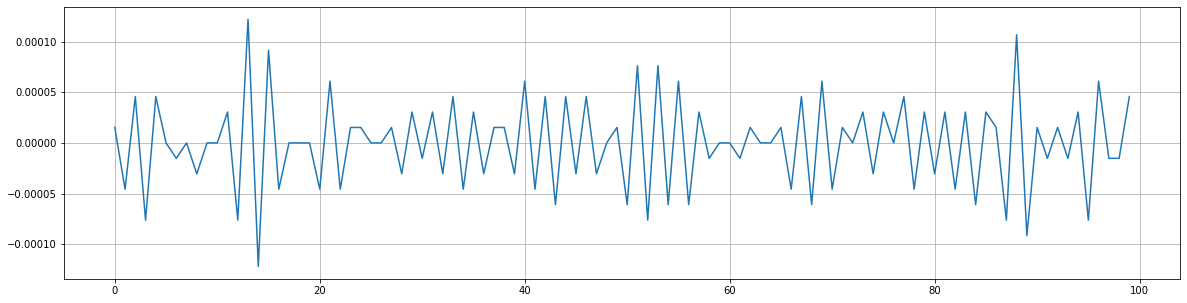

In [15]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

#### Spectral centroid

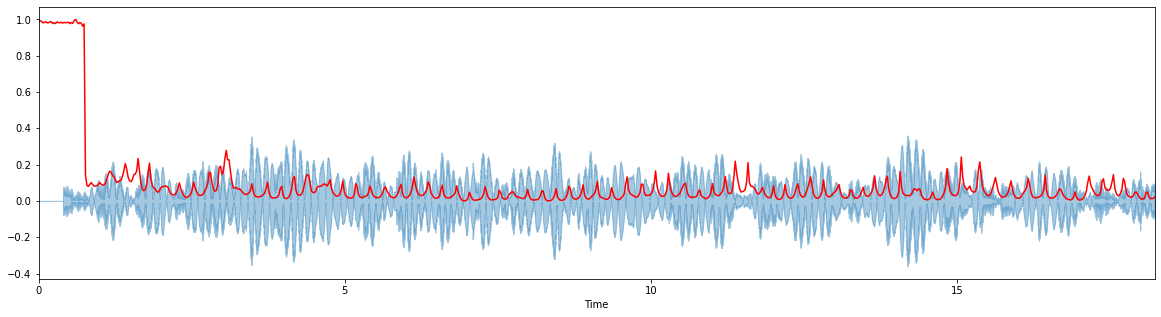

In [16]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]

plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#### Spectral rolloff

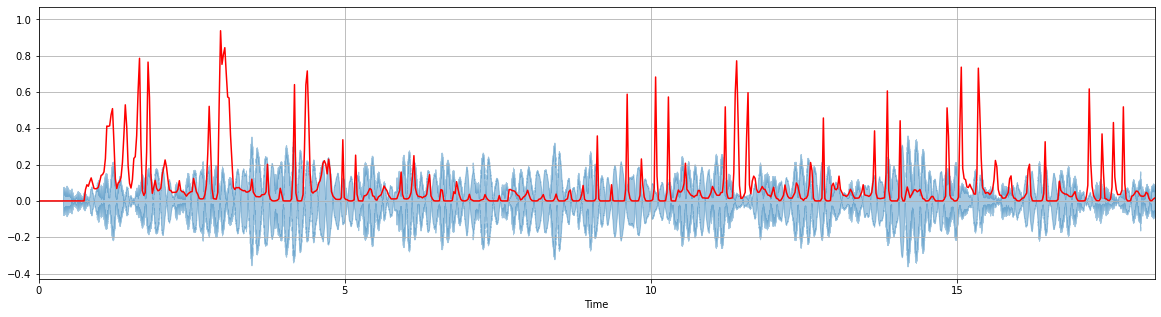

In [17]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=fs)[0]
librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

#### Tempogram

In [18]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=x, sr=fs, hop_length=hop_length)
tempogram = np.mean(librosa.feature.tempogram(onset_envelope=oenv, sr=fs,hop_length=hop_length))
        
frames = range(len(oenv))
t = librosa.frames_to_time(frames, sr=fs, hop_length=hop_length)

Text(0.5, 1.0, 'Tempogram: Novelty function')

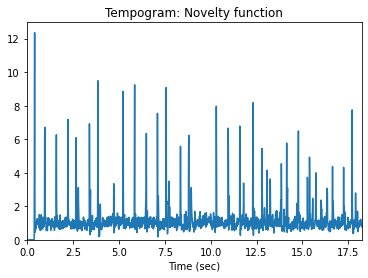

In [19]:
plt.plot(t, oenv)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Tempogram: Novelty function')

* Audio signals are extremely complex and have too many features for us to use. We use dimensionality reduction and select a few key features which should be able to classify the songs.

In [20]:
import sklearn

def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
    X,y =[],[]
    for file in tqdm(files):
        fileID = file.split('/')[-1]
        file_name = file.split('/')[-1]
        yi = labels_file.loc[fileID]['song']=='Potter'
        
        fs = None # if None, fs would be 22050
        x, fs = librosa.load(file,sr=fs) #extracting the raw signal
        if scale_audio: x = x/np.max(np.abs(x)) #Scaling. change it about
        
        hop_length = 512
        oenv = librosa.onset.onset_strength(y=x, sr=fs, hop_length=hop_length)
        
        tempogram = np.mean(librosa.feature.tempogram(onset_envelope=oenv, sr=fs,hop_length=hop_length))
#         mfccs = np.mean(librosa.feature.mfcc(x, sr=fs))
        zero_cross = np.sum(librosa.feature.zero_crossing_rate(x))
        spectral_centroids_mean = np.mean(librosa.feature.spectral_centroid(x, sr=fs))
        spectral_centroids_std = np.std(librosa.feature.spectral_centroid(x, sr=fs))
        spectral_rolloff_mean = np.mean(librosa.feature.spectral_rolloff(x, sr=fs))
        spectral_rolloff_std = np.std(librosa.feature.spectral_rolloff(x, sr=fs))
        
        xi = [tempogram,zero_cross,spectral_centroids_mean,spectral_centroids_std,
              spectral_rolloff_mean,spectral_rolloff_std]
        X.append(xi)
        y.append(yi)
    
    return np.array(X),np.array(y)


In [21]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 420/420 [02:57<00:00,  2.37it/s]


In [22]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)

The shape of X is (420, 6)
The shape of y is (420,)


# 8 Results

**Carry out your experiments here, explain your results.**

### Modelling

#### Split data into train and validation

In [23]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((294, 6), (126, 6), (294,), (126,))

#### Visualisation of dataset

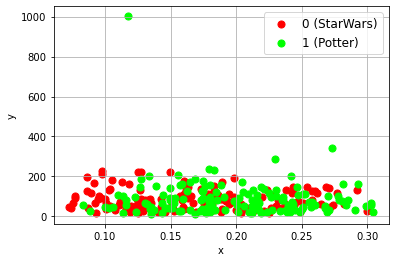

In [24]:
scatter = plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], s=50 , 
                      color= '#FF0000', label='{:d} ({:s})'.format(0, MLENDHW_df.song[0]))

scatter = plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], s=50 , 
                      color= '#00FF00',label='{:d} ({:s})'.format(1, MLENDHW_df.song[1]))
                      
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=12)
plt.grid(True)

#### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
clf.fit(X_train,y_train)

print('Training dataset accuracy: {0}.'.format(clf.score(X_train,y_train)))
print('Validation dataset accuracy: {0}.'.format(clf.score(X_val,y_val)))

Training dataset accuracy: 0.5306122448979592.
Validation dataset accuracy: 0.49206349206349204.


In [26]:
parameters = {'C':[0.001,.009,0.01,.09,1,5,10,25]}
clf = LogisticRegression(max_iter=1000)
clf_cv = GridSearchCV(clf, parameters)
clf_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(clf_cv.best_estimator_),'\n')
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(clf_cv.best_score_),'\n')
print('Training dataset accuracy of best hyperparameter setting: {0}.'.format(clf_cv.score(X_train, y_train)),'\n')
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(clf_cv.score(X_val, y_val)))

Best hyperparameter setting: LogisticRegression(C=0.09, max_iter=1000). 

Average accuracy across folds of best hyperparameter setting: 0.5133839859731152. 

Training dataset accuracy of best hyperparameter setting: 0.5272108843537415. 

Validation dataset accuracy of best hyperparameter setting: 0.49206349206349204.


#### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

print('Training dataset accuracy: {0}.'.format(knn.score(X_train,y_train)))
print('Validation dataset accuracy: {0}.'.format(knn.score(X_val,y_val)))

Training dataset accuracy: 0.6632653061224489.
Validation dataset accuracy: 0.5079365079365079.


In [28]:
parameters = {'n_neighbors': [4, 9, 15, 23, 37]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_),'\n')
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_),'\n')
print('Training dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_train, y_train)),'\n')
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_val, y_val)))

Best hyperparameter setting: KNeighborsClassifier(n_neighbors=37). 

Average accuracy across folds of best hyperparameter setting: 0.5207481005260082. 

Training dataset accuracy of best hyperparameter setting: 0.5510204081632653. 

Validation dataset accuracy of best hyperparameter setting: 0.47619047619047616.


#### SVM

In [29]:
svc = svm.SVC(C=1)
svc.fit(X_train, y_train)

print('Training dataset accuracy: {0}.'.format(svc.score(X_train,y_train)))
print('Validation dataset accuracy: {0}.'.format(svc.score(X_val,y_val)))
print('The support vectors are', svc.support_vectors_.shape,'\n')

Training dataset accuracy: 0.5680272108843537.
Validation dataset accuracy: 0.4523809523809524.
The support vectors are (282, 6) 



In [30]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc_cv = GridSearchCV(svc, parameters)
svc_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(svc_cv.best_estimator_),'\n')
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(svc_cv.best_score_),'\n')
print('Training dataset accuracy of best hyperparameter setting: {0}.'.format(svc_cv.score(X_train, y_train)),'\n')
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(svc_cv.score(X_val, y_val)))

Best hyperparameter setting: SVC(C=10, kernel='linear'). 

Average accuracy across folds of best hyperparameter setting: 0.5270017533606077. 

Training dataset accuracy of best hyperparameter setting: 0.5102040816326531. 

Validation dataset accuracy of best hyperparameter setting: 0.46825396825396826.


### Normalised solution

In [31]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

#### Visualisation of dataset

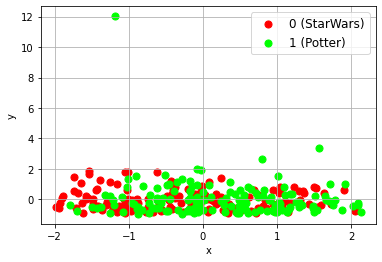

In [32]:
scatter = plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], s=50 , 
                      color= '#FF0000', label='{:d} ({:s})'.format(0, MLENDHW_df.song[0]))

scatter = plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], s=50 , 
                      color= '#00FF00',label='{:d} ({:s})'.format(1, MLENDHW_df.song[1]))
                      
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=12)
plt.grid(True)

#### Logistic regression

In [33]:
parameters = {'C':[0.001,.009,0.01,.09,1,5,10,25]}
clf = LogisticRegression(max_iter=1000)
clf_cv = GridSearchCV(clf, parameters)
clf_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(clf_cv.best_estimator_),'\n')
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(clf_cv.best_score_),'\n')
print('Training dataset accuracy of best hyperparameter setting: {0}.'.format(clf_cv.score(X_train, y_train)),'\n')
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(clf_cv.score(X_val, y_val)))

Best hyperparameter setting: LogisticRegression(C=0.01, max_iter=1000). 

Average accuracy across folds of best hyperparameter setting: 0.6122735242548216. 

Training dataset accuracy of best hyperparameter setting: 0.6020408163265306. 

Validation dataset accuracy of best hyperparameter setting: 0.6111111111111112.


#### KNN

In [34]:
parameters = {'n_neighbors': [4, 9, 15, 23, 37]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_),'\n')
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_),'\n')
print('Training dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_train, y_train)),'\n')
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_val, y_val)))

Best hyperparameter setting: KNeighborsClassifier(n_neighbors=37). 

Average accuracy across folds of best hyperparameter setting: 0.5817650496785506. 

Training dataset accuracy of best hyperparameter setting: 0.6360544217687075. 

Validation dataset accuracy of best hyperparameter setting: 0.5079365079365079.


#### SVM

In [35]:
svc = svm.SVC(C=1)
svc.fit(X_train, y_train)

print('Training dataset accuracy: {0}.'.format(svc.score(X_train,y_train)))
print('Validation dataset accuracy: {0}.'.format(svc.score(X_val,y_val)))
print('The support vectors are', svc.support_vectors_.shape,'\n')

Training dataset accuracy: 0.6700680272108843.
Validation dataset accuracy: 0.5793650793650794.
The support vectors are (249, 6) 



In [36]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc_cv = GridSearchCV(svc, parameters)
svc_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(svc_cv.best_estimator_),'\n')
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(svc_cv.best_score_),'\n')
print('Training dataset accuracy of best hyperparameter setting: {0}.'.format(svc_cv.score(X_train, y_train)),'\n')
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(svc_cv.score(X_val, y_val)))

Best hyperparameter setting: SVC(C=1, kernel='linear'). 

Average accuracy across folds of best hyperparameter setting: 0.5952659263588544. 

Training dataset accuracy of best hyperparameter setting: 0.608843537414966. 

Validation dataset accuracy of best hyperparameter setting: 0.6349206349206349.


### Explaining results

The results from our experiment are as follows. After evaluating the validation accuracy on our learned models, we select the best ML pipeline for our solution. We evaluated our models by their training accuracy. We compare each models validation accuracy as the trained models need to be tested with unseen data to see if it works well in deployment. Training accuracy can easily lead to an overfitted model and we need to test if our models generalise to the 'population'. It is no good having a good training accuracy and a poor validation accuracy so this is the final step in choosing the best model. Based on validation accuracy we decide which model we are going to take through to deployment before running the final test dataset on our model and then deploying it. The model with the best validation accuracy for our pipeline is SVM with 64%. 

We received low accuracy for all 3 classifiers although we performed a grid search and cross validation. The highest accuracy we achieved for a model was: hyperparameter setting: SVC(C=1, kernel='linear') with 64% accuracy. All of our models performed poorly in the pipeline so we ran another one where we normalised the data and accuracy significantly improved. Normalisation scales all of the features so they are in similar ranges. (miles and km) for example are in different units. This allowed us to get a better solution pipeline to the problem although accuracy was still poor overall, all the models performed up to 10% better when normalised.

Evaluating model performance with the data used for training is not acceptable because it can easily generate overfitted models and we can fool ourselves. The trained model needs to be tested against unseen data to see how it generalises. We choose the model with the best validation accuracy and we need to be careful not to overfit. if training is higher than validation we are overfitting. We are not overfitting as we got 65% validation accuracy, 90 plus in training and low validation would be overfitting.

# 9 Conclusions

* Your conclusions, improvements, etc should go here

Our ML pipeline could improve in a number of ways. Especially as we got poor performance at deployment, I think the first improvement could be to have more domain knowledge which would allow us to extract the more relevant features.

Next time we can carry out the experiment, random sampling / stratified sampling or oversampling could be used for the imbalanced class issue. This may produce more accurate predictions. We assumed that there was enough data for each class to be either representative of the population or to be enough for decision boundaries to be accurately created.

More features could allow us to have more of the original variation in the data. We only chose 4 features which is of course a small percentage of the sample sizer of features of over 60,000. We may have been better off carrying out PCA which may better represent such a large feature size. PCA summarises the data using a few well-designed features. Removing irrelevant features improves accuracy. The new attributes are defined as operations on the original attributes. This is common when using complex data types such as audio. PCA may have been more applicable to this problem than feature selection. We may have gotten a model which doesn't perform so poorly at deployment.

The model performs poorly at deployment so is not useful. The model also has a slight risk of overfitting as the training accuracy for some of the classifiers is alot higher than the validation accuracy. We got poor performance as our quality metric is accuracy and the highest validation accuracy we got for our pipeline was 65%. This predicts incorrectly too often so is not useful for deployment. As incorrect predictions do not lead to any consequences we did not need to implement a cost function and this also lessens the impact of it not being so accurate.

Another possible improvement could have been to provide the workflow with more data to make our pipeline more robust. We had nearly double the amount of data used still available and this means our pipeline doesnt correctly represent the population of all the data we had available. There may have been more learning based on the rest of the data which could have solved a few issues such as imbalances in classes and also more accurate predictions. We opted for the faster processing speeds and taking up less storage space. There was also lots of incorrectly named files which were removed from the dataset. The trade off is a less robust model and this proved to be an issue in our final pipeline.

In conclusion our model needs significant work and is not fit for deployment. Next time we will work on our domain knowledge and doing more transformations to the data, as well as including more data. If time constaints aren't an issue we can get far more accuate models which are fit for deployment